<a href="https://colab.research.google.com/github/rsaeed15/rsaeed15/blob/main/housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Machine Learning Model for House Value of the Real Estate Properties 
# Author: Rifat Saeed

In [ ]:
# Importing libraries
import numpy as np
from sklearn import preprocessing, neighbors 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [ ]:
# Loading data file
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['housing.csv']))

In [29]:
# Bar Plot of missing and non_missing Target data 
import matplotlib.pyplot as plt
missing=df.median_house_value.isnull().sum()
nonmissing=df.median_house_value.notnull().sum()
x=['missing','Non-Missing']
y=[missing,nonmissing]

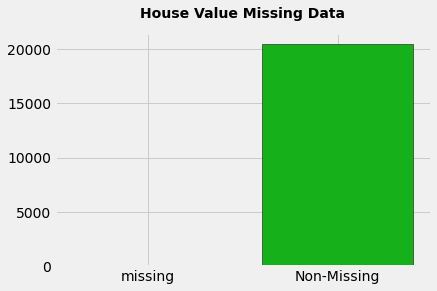

In [33]:
fig,ax=plt.subplots()
p=ax.bar(x,y,color=['#FF0000','#15B01A'], ec='black')
ax.set_title('House Value Missing Data', fontsize=14, fontweight='bold',pad=15)
plt.show()

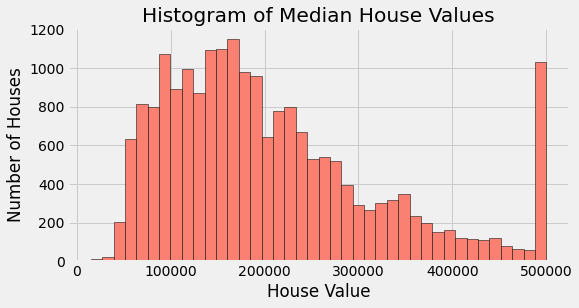

In [34]:
# Histogram of House Value
df.median_house_value.hist(bins=40,figsize=(8,4), color='#FA8072',ec='black')
plt.xlabel('House Value')
plt.ylabel('Number of Houses')
plt.title('Histogram of Median House Values')
plt.show()

In [31]:
mapping = {'OCEAN':1, 'INLAND':2, 'NEAR OCEAN':3, 'ISLAND':4,'NEAR BAY':5,'<1H OCEAN':6}
df.replace({'ocean_proximity': mapping},inplace=True)

In [36]:
df['ocean_proximity'] = pd.to_numeric(df['ocean_proximity'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  int64  
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.7 MB


In [37]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,0.114444,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.336330,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.188990,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,-0.018337,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.009875,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,0.044402,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.040634,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.221270,0.688355
ocean_proximity,0.114444,-0.336330,0.188990,-0.018337,0.009875,0.044402,0.040634,0.221270,1.000000,0.395727
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,0.395727,1.000000


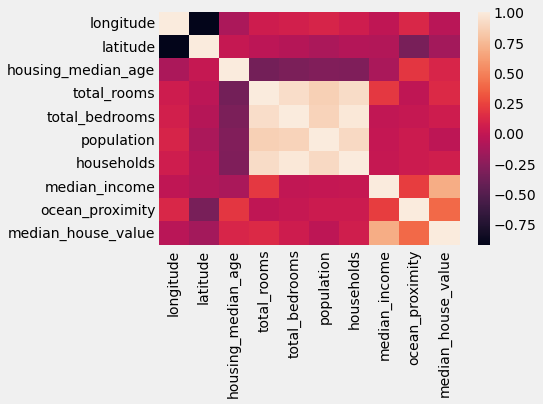

In [38]:
import seaborn as sns
sns.heatmap(df.corr())

In [39]:
X=df.iloc[:,0:7].values ##### Input features
y=df.iloc[:,8].values

In [40]:
# Splitting the data into training and testing sets
from sklearn import preprocessing
import numpy as np
#X_n = preprocessing.normalize(X) # changed to 2D numpy array 
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)  
y_test

array([6, 6, 3, ..., 2, 2, 6])

In [41]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators =100, random_state = 42)
# Train the model on training data
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [42]:
# Feature Importance
importances = list(rf.feature_importances_)

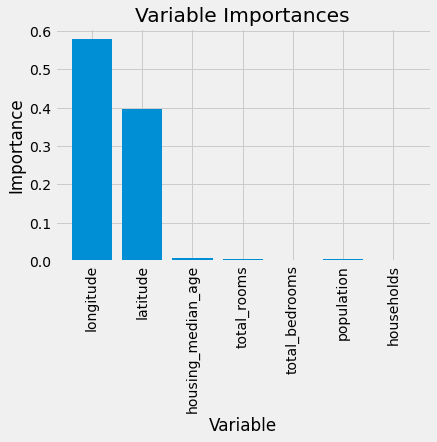

In [43]:
# Plotting Feature Importance
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, df.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [45]:
# Training Accuracy
train_accuracy=rf.score(X_train,y_train)
train_accuracy

0.9944686080614216

In [46]:
# Testing Accuracy
test_accuracy=rf.score(X_test,y_test)
test_accuracy

0.9629672591776737

In [ ]:
# Predicting the target values of the test set
y_pred = rf.predict(X_test)